## EECS 491 Assignment 1

Due Wed Feb 5 before midnight. 120 points total.

### Submitting assignments to Canvas

- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook.  

- If your are not using notebooks, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS491-A1-yourcaseid.ipynb`
  - `EECS491-A1-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS491-A1-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS491-A1-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

Some of questions below aren't specified in great detail and you may need to spend sometime making sense of the questions themselves, which you can do from the reads and other sources.  You also might need to fill in some blanks or make some assumptions.  The spirit behind this approach is explained in [The Problem with Problems](http://web.mit.edu/6.969/www/readings/mazur.pdf) by Eric Mazur, which I encourage everyone to read.

## Put your name and Case ID here
Gary Yao; gxy76

### [Q1. Basic probability (10 pts)

1.1. Prove (5 pts)
$$ p(x,y|z) = p(x|z)p(y|x,z) $$
Proof:
1) Using rules of joint probability
$$ p(x,y|z) = \frac{p(x,y,z)}{p(z)} $$
$$ p(x|z) = \frac{p(x,z)}{p(z)} $$
$$ p(y|x,z) = \frac{p(x,y,z)}{p(x,z)} $$
2) Plug into original
$$ p(x,y|z) = p(x|z)p(y|x,z) $$
$$ \frac{p(x,y,z)}{p(z)} = \frac{p(x,z)}{p(z)} * \frac{p(x,y,z)}{p(x,z)} $$
3) It can be observed that the two sides are equal.

1.2. Prove (5 pts)
$$ p(x|y,z) = \frac{p(y|x,z)p(x|z)}{p(y|z)} $$
1) Using rules of joint probability
$$ p(x|y,z) = \frac{p(x,y,z)}{p(y,z)}$$
$$ p(y|x,z) = \frac{p(x,y,z)}{p(x,z)}$$
$$ p(x|z) = \frac{p(x,z)}{p(z)} $$
$$ p(y|z) = \frac{P(y,z)}{p(z)} $$
2) Plug into original
$$ \frac{p(x,y,z)}{p(y,z)} = \frac{\frac{p(x,y,z)}{p(x,z)} * \frac{p(x,z)}{p(z)}}{\frac{P(y,z)}{p(z)}} \$$

$$ \frac{p(x,y,z)}{p(y,z)} = \frac{\frac{p(x,y,z)}{1} * \frac{1}{1}}{\frac{P(y,z)}{1}} \$$
3) It can be seen that the two sides are indeed equal.

### Q2. Independence (10 pts)

2.1 Show that independence is not transitive, i.e. 
$a \perp b \wedge b \perp c \nRightarrow a \perp c$. Define a joint probability distribution $p(a,b,c)$ for which the previous expression holds and provide an interpretation. (5 pts)

Counter Example: 

Conceptually, we can find two uncorrelated events, define a and c to both correlate with the first event and define b to correlate with the second event to disprove this statement.

Let t1,t2 be the results of two independent, fair coin tosses. Let a be the result of t1, let c be the "not" result of t1, let b be the result of t2.

A Joint Probability distribution can be defined by the following tables.

| B = head     | a = head | a = tail |
|--------------|----------|----------|
| c = not head | 0        | 1/4      |
| c = not tail | 1/4      | 0        |


| B = tail     | a = head | a = tail |
|--------------|----------|----------|
| c = not head | 0        | 1/4      |
| c = not tail | 1/4      | 0        |

Clearly, a and c are dependent while both a and c are independent of b.

2.2 Show that conditional independence does not imply marginal independence, i.e. $a \perp b | c \nRightarrow a \perp b$. Again provide an example. (5 pts)

Example:

| c = 1     | a = 1 | a = 0 |
|-----------|-------|-------|
| b = 1 | 1/16       | 3/16   |
| b = 0 | 1/16       | 3/16   |

| c = 0     | a = 1 | a = 0 |
|-----------|-------|-------|
| b = 1     | 1/16  | 3/16   |
| b = 0     | 3/16  | 1/16   |

Where all variables are binary and p(c) = .5, when c = 1, a and b are independent.

However, using mariginarization to remove c from pdf


|      | a = 1 | a = 0 |
|-----------|-------|-------|
| b = 1     | 1/8  | 3/8   |
| b = 0     | 1/4  | 1/4   |

a and b are no longer independent.



### Q3. Inspector Clouseau re-revisited (20 pts)

3.1 Write a program to evaluate $p(B|K)$ in Example 1.3 in Barber. Write your code and choose your data representations so that it is easy to use it to solve the remaining questions. Show that it correctly computes the value in the example. (5 pts)

3.2 Define a different distribution for $p(K|M,B)$.  Your new distribution should result in the outcome that $p(B|K)$ is either $<0.1$ or $>0.9$, i.e. reasonably strong evidence.  Use the original values of $p(B)$ and $p(M)$ from the example.  Provide (invent) a reasonble justification for the value of each entry in $p(K|M,B)$. (5 pts)

3.3 Derive the equation for $p(M|K)$. (5 pts)

3.4 Calculate it's value for both the original $p(K|M,B)$ and the one you defined yourself. Is it possible to provide a summary of the main factors that contributed to the value?  Why/Why not?  Explain. (5 pts)

In [0]:
prior_B = .8
prior_M = .2
cond_NK__NB_NM = .3
cond_NK__NB_M = .2
cond_K__B_NM = .6
cond_K__B_M = .1
cond_B_K = prior_B*(prior_M*cond_K__B_M + (1-prior_M)*cond_K__B_NM)/(prior_B*(cond_K__B_M*prior_M+cond_K__B_NM*(1-prior_M)) + (1-prior_B)*(cond_NK__NB_M*prior_M + cond_NK__NB_NM*(1-prior_M)))
print(cond_B_K)

0.8771929824561404


In [0]:
prior_B = .8
prior_M = .2
cond_NK__NB_NM = .3
cond_NK__NB_M = .2
cond_K__B_NM = .6
cond_K__B_M = .9
cond_B_K = prior_B*(prior_M*cond_K__B_M + (1-prior_M)*cond_K__B_NM)/(prior_B*(cond_K__B_M*prior_M+cond_K__B_NM*(1-prior_M)) + (1-prior_B)*(cond_NK__NB_M*prior_M + cond_NK__NB_NM*(1-prior_M)))
print(cond_B_K)

0.9041095890410958


3.3 
$$p(M|K) = \frac{p(M)\sum_b p(K|b,M)p(b)}{\sum_m p(m) \sum_b p(K|b,m)p(b)}$$

In [0]:
prior_B = .8
prior_M = .2
cond_NK__NB_NM = .3
cond_NK__NB_M = .2
cond_K__B_NM = .6
cond_K__B_M = .1
p_BMK = prior_M * (cond_K__B_M*prior_B+(1-cond_NK__NB_M)+(1-prior_B))
p_BM_K = (1-prior_M) * (cond_K__B_NM*prior_B + (1 - cond_NK__NB_NM)*(1-prior_B)) 
cond_M__K =p_BMK/(p_BMK+p_BM_K)
print(cond_M__K)

0.303370786516854


In [0]:
#3.4
prior_B = .8
prior_M = .2
cond_NK__NB_NM = .3
cond_NK__NB_M = .2
cond_K__B_NM = .6
cond_K__B_M = .9
p_BMK = prior_M * (cond_K__B_M*prior_B+(1-cond_NK__NB_M)+(1-prior_B))
p_BM_K = (1-prior_M) * (cond_K__B_NM*prior_B + (1 - cond_NK__NB_NM)*(1-prior_B)) 
cond_M__K =p_BMK/(p_BMK+p_BM_K)
print(cond_M__K)

0.40952380952380957


In 3.2, by increasing the conditional probability for a knife to be used if both B and M were murderers, I was able to bump the B's chance of guilt to over 90%. Similarly, since that conditional probability requires both B and M to be guilt in order for a knife to be used, M's chance of guilt also increases. 

### Q4. Biased views (20 pts)

4.1 Write a program that calculates the posterior distribution of the $\theta$ (probability of heads) from the Binomial distribution given $y$ heads out of $n$ trials.  Feel to use a package where the necessary distributions are defined as primitives. (5 pts)

4.2 Imagine three different views on the coin bias:
- "I believe strongly that the coin is biased to either mostly heads or mostly tails."
- "I believe strongly that the coin is unbiased".
- "I don't know anything about the bias of the coin."

Define and plot prior distributions that expresses each of these beliefs.  Provide a brief explanation. (5 pts)

4.3 Perform Bernoulli trials where one of these views is correct.  Show how the posterior distribution of $\theta$ changes for each view for $n$=0, 1, 2, 5, 10, and 100.  Each view should have its own plot, but with the curves of the posterior after different numbers of trials overlayed. (5 pts)

4.4 Is it possible that each view will always arrive at an accurate estimate of $\theta$?  How might you determine which view is most consistent with the data after $n$ trials? (5 pts)

In [0]:
import numpy as np
import random
from scipy.stats import beta
import matplotlib.pyplot as plt

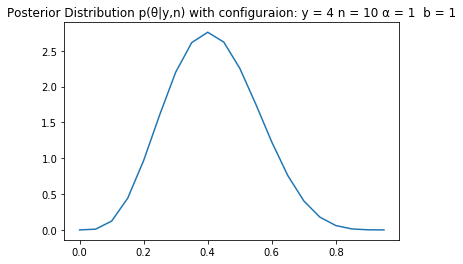

In [0]:
#4.1
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

def plot_posterior_beta(y, n, α, β):
    samples = np.arange(0,1,.05)
    p = beta.pdf(samples, α + y, β + n - y)
    plt.plot(samples, p)
    plt.title("Posterior Distribution p(θ|y,n) with configuraion: y = {} n = {} α = {}  b = {}".format(y,n,α,β))
    plt.show()


plot_posterior_beta(4, 10, 1, 1)

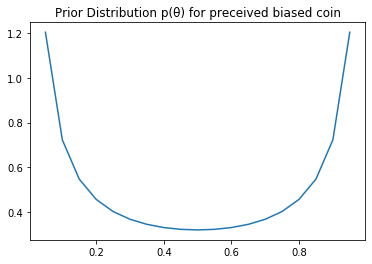

In [0]:
#4.2
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

def plot_with_prior(prior_function, text):
    samples = np.arange(0,1,.05)
    p = prior_function(samples)
    plt.plot(samples, p)
    plt.title("Prior Distribution p(θ) for preceived " + text)
    plt.show()


biased_prior_function = beta(0.2, 0.2).pdf
plot_with_prior(biased_prior_function, "biased coin")

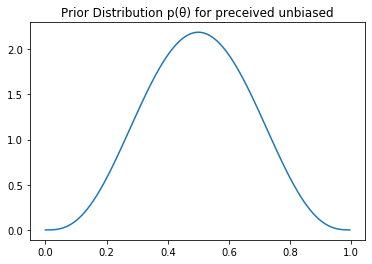

In [0]:
#4.2
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

def plot_with_prior(prior_function, text):
    samples = np.arange(0,1,.005)
    p = prior_function(samples)
    plt.plot(samples, p)
    plt.title("Prior Distribution p(θ) for preceived " + text)
    plt.show()


biased_prior_function = beta(4,4).pdf
plot_with_prior(biased_prior_function, "unbiased")

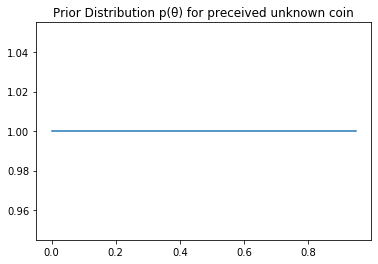

In [0]:
#4.2
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

def plot_with_prior(prior_function, text):
    samples = np.arange(0,1,.05)
    p = prior_function(samples)
    plt.plot(samples, p)
    plt.title("Prior Distribution p(θ) for preceived " + text)
    plt.show()


biased_prior_function = beta(1, 1).pdf
plot_with_prior(biased_prior_function, "unknown coin")

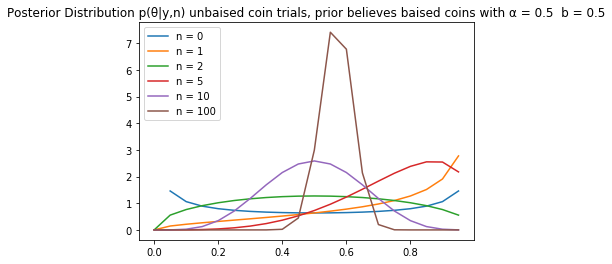

In [0]:
#4.3
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy.stats import binom
#this package allows for simulation of a binomial variable taking value from a binomial distribution where we provide the parameters
def generate_tosses(n,p):
    tosses = binom.rvs(1, p, size=n)
    return tosses

def get_unbaised_tosses(n):
  return generate_tosses(n,.5)

def plot_posterior_beta(y, n, α, β, label):
    samples = np.arange(0,1,.05)
    p = beta.pdf(samples, α + y, β + n - y)
    plt.plot(samples, p, label = label)
    plt.title("Posterior Distribution p(θ|y,n) unbaised coin trials, prior believes baised coins with α = {}  b = {}".format(α,β))  
    plt.legend(loc="upper left")

experiment_sizes = [0, 1, 2, 5, 10, 100]
for size in experiment_sizes:
  current_results = get_unbaised_tosses(size)
  current_head = np.sum(current_results)
  plot_posterior_beta(current_head, size, .5, .5, "n = {}".format(size))


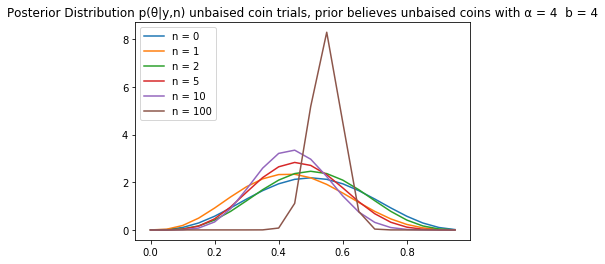

In [0]:
#4.3
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy.stats import binom
#this package allows for simulation of a binomial variable taking value from a binomial distribution where we provide the parameters
def generate_tosses(n,p):
    tosses = binom.rvs(1, p, size=n)
    return tosses

def get_unbaised_tosses(n):
  return generate_tosses(n,.5)

def plot_posterior_beta(y, n, α, β, label):
    samples = np.arange(0,1,.05)
    p = beta.pdf(samples, α + y, β + n - y)
    plt.plot(samples, p, label = label)
    plt.title("Posterior Distribution p(θ|y,n) unbaised coin trials, prior believes unbaised coins with α = {}  b = {}".format(α,β))  
    plt.legend(loc="upper left")

experiment_sizes = [0, 1, 2, 5, 10, 100]
for size in experiment_sizes:
  current_results = get_unbaised_tosses(size)
  current_head = np.sum(current_results)
  plot_posterior_beta(current_head, size, 4, 4, "n = {}".format(size))


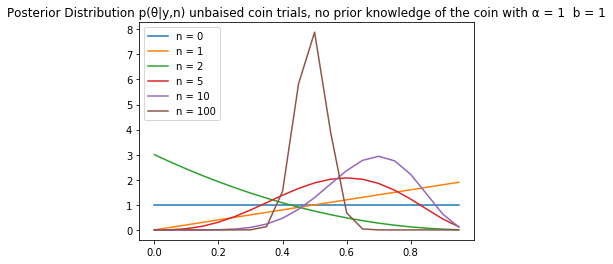

In [0]:
#4.3
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy.stats import binom
#this package allows for simulation of a binomial variable taking value from a binomial distribution where we provide the parameters
def generate_tosses(n,p):
    tosses = binom.rvs(1, p, size=n)
    return tosses

def get_unbaised_tosses(n):
  return generate_tosses(n,.5)

def plot_posterior_beta(y, n, α, β, label):
    samples = np.arange(0,1,.05)
    p = beta.pdf(samples, α + y, β + n - y)
    plt.plot(samples, p, label = label)
    plt.title("Posterior Distribution p(θ|y,n) unbaised coin trials, no prior knowledge of the coin with α = {}  b = {}".format(α,β))  
    plt.legend(loc="upper left")

experiment_sizes = [0, 1, 2, 5, 10, 100]
for size in experiment_sizes:
  current_results = get_unbaised_tosses(size)
  current_head = np.sum(current_results)
  plot_posterior_beta(current_head, size, 1, 1, "n = {}".format(size))

4.4 Is it possible that each view will always arrive at an accurate estimate of  θ ? How might you determine which view is most consistent with the data after  n  trials? (5 pts)

From empirical observation, even with very strong errorous priors, suffience observations will always lead the model to estimate a correct parameter. However, their may exist edge cases where theta = 0 or 1 where an inaccurate prior will always linger a bit of inaccuracy regardless of the data.

The correct prior view had the quickest convegence with smaller n, however as n approach 100, all three views yielded pretty good posterier distributions.

### Q5. Inference using the Poisson distribution (20 pts)

Suppose you observe for 3 seconds and detect a series of events that occur at the following times (in seconds): 0.53, 0.65, 0.91, 1.19, 1.30, 1.33, 1.90, 2.01, 2.48.

5.1 Model the rate at which the events are produced using a Poisson distribution where $\lambda$ is the number of events $n$ observed per unit time (1 second).  Show the likelihood equation and plot it for three different values of $\lambda$: less, about equal, and greater than what you estimate (intuitively) from the data. (5 pts)

5.2 Derive the posterior distribution of $\lambda$ assuming a Gamma prior (usually defined with parameters $\alpha$ and $\beta$).  The posterior should have the form $p(\lambda | n, T, \alpha, \beta)$ where $T$ is the total duration of the observation period and $n$ is the number of events observed within that period. (5 pts)

5.3 Show that the Gamma distribution is a *conjugate prior* for the Poisson distribution, i.e. it is also a Gamma distribution, but defined by parameters $\alpha'$ and $\beta'$ that are functions of the prior and likelihood parameters. (5 pts)

5.4 Plot the posterior distribution for the data above at times $T$ = 0, 0.5, and 1.5.  Overlay the curves on a single plot.  Comment how it is possible for your beliefs to change even though no new events have been observed. (5 pts)


A simple estimation is 9 events/2.48 seconds = 3.62 events/sec

In [0]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

def plot_poisson_dist(x, l, title):
    samples = np.arange(0,x,1)
    prob = poisson.pmf(samples, l)
    plt.plot(samples, prob)
    plt.title(title)

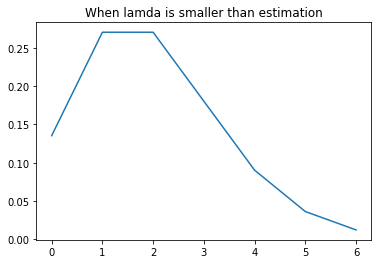

In [0]:
plot_poisson_dist(7, 2, "When lamda is smaller than estimation")

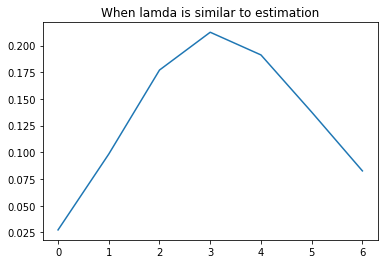

In [0]:
plot_poisson_dist(7, 3.6, "When lamda is similar to estimation")

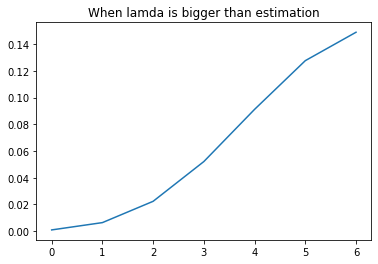

In [0]:
plot_poisson_dist(7, 7, "When lamda is bigger than estimation")

It can be seen that when lambda is close to the estimation, the resultant maximum likihood lambda value is the most reasonable.

5.2 Derive the posterior distribution of  λ  assuming a Gamma prior (usually defined with parameters  α  and  β ). The posterior should have the form  p(λ|n,T,α,β)  where  T  is the total duration of the observation period and  n  is the number of events observed within that period. (5 pts)

By Bayes Rule

$$ p(λ|n,T,α,β) = \frac{p(n,T|λ,α,β) * p(λ|α,β)}{p(n,T)} $$

Since α,β do not affect the observation:

$$ p(n,T|λ,α,β) = p(n,T|λ) $$

p(n,T|λ) is the poisson distribution

As such, 
$$ p(n,T|λ) = λ^{n/T}e^{−λ}$$

Giving in problem statement:
Prior $$ p(λ|α,β) = \frac{b^{a}}{Γ(α)} * λ^{α−1}e^{−βλ} $$

Combined to find the numerator of the whole posterier expression:

$$\frac{\beta^\alpha}{\Gamma(\alpha)}\frac{\lambda^{n/T+\alpha-1}e^{-\beta\lambda-\lambda}}{}$$

Now we need to find the scaling factor to make sure this probability sums to 1.

$$ \sum_\alpha \sum_\beta \frac{\beta^\alpha}{\Gamma(\alpha)}\frac{\lambda^{n/T+\alpha-1}e^{-\beta\lambda-\lambda}}{} = \sum_\alpha \sum_\beta λ^{n/T}e^{−λ} * \frac{b^{a}}{Γ(α)} * λ^{α−1}e^{−βλ}$$

Taking unrelated factors out of the summation:

$$ λ^{n/T}e^{−λ} * \sum_\alpha \sum_\beta \frac{b^{a}}{Γ(α)} * λ^{α−1}e^{−βλ} $$

It can be seen that the summation contains the gamma distribution. Every distribution must sum to 1, thus the numerator equals $$ λ^{n/T}e^{−λ} $$

To make sure that the expression integerates to 0, $$p(n,T) = λ^{n/T}e^{−λ} $$

Plug in to find that the posterier equals: 

$$p(\lambda|n,T,\alpha,\beta) = \frac{b^{a}}{Γ(α)} * λ^{α−1}e^{−βλ}$$

The gamma distribution


5.3 Show that the Gamma distribution is a *conjugate prior* for the Poisson distribution, i.e. it is also a Gamma distribution, but defined by parameters $\alpha'$ and $\beta'$ that are functions of the prior and likelihood parameters. (5 pts)

I most like made some weird summation assumption error to arrive upon the previous result.
In case I was correct, then trivially Gamma is Poisson's conjugate prior. 
Otherwise, it can be observed that ignoring the scaling constant, $$p(\lambda|n,T,\alpha,\beta) \propto \frac{\beta^\alpha}{\Gamma(\alpha)}\frac{\lambda^{n/T+\alpha-1}e^{-\beta\lambda-\lambda}}{}$$

Removing the constants unrelated to alpha and beta

$$p(\lambda|n,T,\alpha,\beta) \propto \frac{b^{a}}{Γ(α)} * λ^{α−1}e^{−βλ}$$

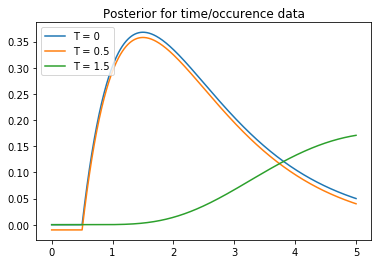

In [0]:
from scipy.stats import gamma
import matplotlib.pyplot as plt

def plot_posterior_poisson(T, n, α, β, label, ax):
    if (T == 0):
        T = .001
    
    p = []
    ls = []
    
    α = n/T + α
    β = β + 1
    for i in [float(j) / 100 for j in range(0, 501, 1)]:
        ls.append(i)
        if (T == 0.5):
            p.append(gamma.pdf(i, α, 1/β) - 0.01) 
        else:
            p.append(gamma.pdf(i, α, 1/β)) 
    ax.plot(ls, p, label=label)
    ax.legend(loc="upper left")
    
fig, ax = plt.subplots(1, 1)
plt.title("Posterior for time/occurence data")

plot_posterior_poisson(0, 0, 2, 1, 'T = 0', ax)
plot_posterior_poisson(0.5, 0, 2, 1, 'T = 0.5', ax)
plot_posterior_poisson(1.5, 6, 2, 1, 'T = 1.5', ax)

### Q6. Exploration (40 pts)

In these problems, you are meant to do creative exploration.  Define and explore:

6.1 A discrete inference problem (20 pts)

6.2 A continuous inference problem (20 pts)

This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  You can also start to explore ideas for your project.  The general idea is for you to teach yourself (and potentially a classate) about a concept from the assignments and readings or solidify your understanding of required technical background. For additional guidance, see the grading rubric below.

You can use the readings and other sources for inspiration, but here are a few ideas:
- An inference problem using categorical data
- A disease for which there are two different tests
- A two-dimensional continuous inference problem
- The idea of a conjugate prior


Exploration: Learning how to classify a song's genre using its lyric, a probabilistic approach

During last semester's course in Data Analysis, we set out to analyze the effect of a song's lyrics on its popularity. It turns out that lyrics alone provided little information on a song's popularity. Instead, from the appearence and density of certain keywords, we were able to build linear regression models that classified genres with impressive accuracies. In this exploration, I try to beat our previous results using probalistic approaches. I have reasons to believe so because:

1. Linear regression models were severely overfitting, suspected to be caused by a overload of features and the data's sparcity
2. There are suffience information within the presence of certain words such as "guns" or "horse" to be almost certains of the genre. This can easily be formulated as a probalistic model problem.


Whether a specific word appears in an arbiturary song of a certain genre can be modeled as a bouilli variable. 

I really didn’t want to use this example, but the n-word is an exceptionally strong characteristic of the hip-pop genre and no other word I found was as descriptive. It proved to be a critical feature when we ran logistic regression classifiers


DataLoading

In [0]:
import numpy as np

In [0]:
hippop_n_word_appeared = np.array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,]
)

In [0]:
pop_n_word_appeared = np.array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0.])



I gave a prior estimation that 30 percent of hip-pop songs uses the n-word. Let’s sample various numbers of random hip-pop songs from our scraped dataset to calculate a posterior probability depending of the chance for the n-word to appear in song. 

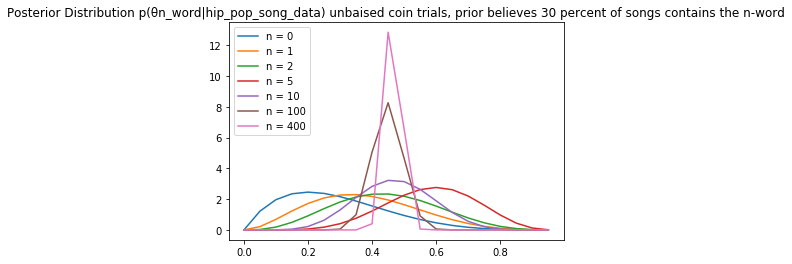

In [0]:
#4.3
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy.stats import binom
#this package allows for simulation of a binomial variable taking value from a binomial distribution where we provide the parameters
def retrive_data(n,genre):
    if genre == 'hip-pop':
        data = hippop_n_word_appeared[:n]
    else:
        data = pop_n_word_appeared[:n]
    return data

def plot_posterior_beta(y, n, α, β, label):
    samples = np.arange(0,1,.05)
    p = beta.pdf(samples, α + y, β + n - y)
    plt.plot(samples, p, label = label)
    plt.title("Posterior Distribution p(θn_word|hip_pop_song_data) unbaised coin trials, prior believes 30 percent of songs contains the n-word")  
    plt.legend(loc="upper left")

experiment_sizes = [0, 1, 2, 5, 10, 100, 400]
for size in experiment_sizes:
  current_results = retrive_data(size,'hip-pop')
  current_head = np.sum(current_results)
  plot_posterior_beta(current_head, size, 2, 5, "n = {}".format(size))



To compare, a less conservative prior estimation could be 50 percent


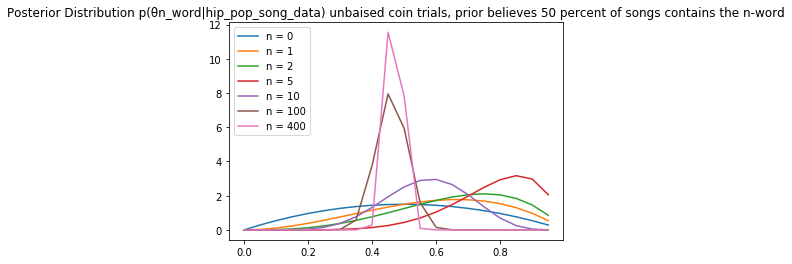

In [0]:
#4.3
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy.stats import binom
#this package allows for simulation of a binomial variable taking value from a binomial distribution where we provide the parameters
def retrive_data(n,genre):
    if genre == 'hip-pop':
        data = hippop_n_word_appeared[:n]
    else:
        data = pop_n_word_appeared[:n]
    return data

def plot_posterior_beta(y, n, α, β, label):
    samples = np.arange(0,1,.05)
    p = beta.pdf(samples, α + y, β + n - y)
    plt.plot(samples, p, label = label)
    plt.title("Posterior Distribution p(θn_word|hip_pop_song_data) unbaised coin trials, prior believes 50 percent of songs contains the n-word")  
    plt.legend(loc="upper left")

experiment_sizes = [0, 1, 2, 5, 10, 100, 400]
for size in experiment_sizes:
  current_results = retrive_data(size,'hip-pop')
  current_head = np.sum(current_results)
  plot_posterior_beta(current_head, size, 2, 2, "n = {}".format(size))


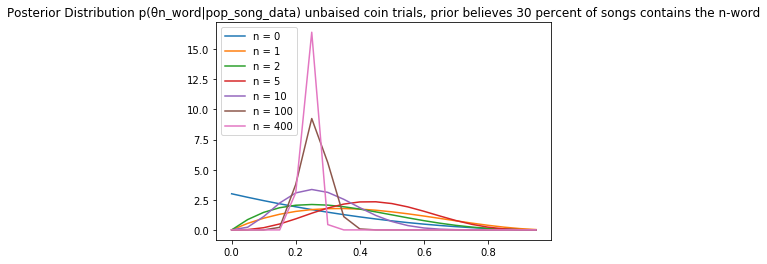

In [0]:
#4.3
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy.stats import binom
#this package allows for simulation of a binomial variable taking value from a binomial distribution where we provide the parameters
def retrive_data(n,genre):
    if genre == 'hip-pop':
        data = hippop_n_word_appeared[:n]
    else:
        data = pop_n_word_appeared[:n]
    return data

def plot_posterior_beta(y, n, α, β, label):
    samples = np.arange(0,1,.05)
    p = beta.pdf(samples, α + y, β + n - y)
    plt.plot(samples, p, label = label)
    plt.title("Posterior Distribution p(θn_word|pop_song_data) unbaised coin trials, prior believes 30 percent of songs contains the n-word")  
    plt.legend(loc="upper left")

experiment_sizes = [0, 1, 2, 5, 10, 100, 400]
for size in experiment_sizes:
  current_results = retrive_data(size,'pop')
  current_head = np.sum(current_results)
  plot_posterior_beta(current_head, size, 1, 3, "n = {}".format(size))


It can be seen that similar to the coin toss experiment, a wrongly estimated prior can always be overcame by having a lot of data. Apparently, 25% of pop songs and 50% of hip-pop songs contain the n-word

An idea of a probability-based genre classifier is to fit exponencial decay distributions with how many times a specific word appears per song within a genre. This continuous distribution can be used for predicting a song's genre.

Let g be the variable of the song's genre.
Let t be the number of times a word appears in the song.

$$ p(g|t) = \frac{p(t|g)*p(g)}{p(t)}$$

p(t|g) can be described by the continuous distribution, p(g) is 1/5 as all genre has same sample size, p(t) can be described by combining all songs from all genres to fit a exponential destribution.

In [0]:
n_word_hip_pop_appareance = np.array([10.0, 2.0, 2.0, 9.0, 0.0, 9.0, 0.0, 10.0, 1.0, 1.0, 1.0, 1.0, 0.0,
       6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 7.0, 1.0, 1.0, 0.0, 2.0,
       0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 3.0, 0.0, 6.0, 3.0, 0.0, 1.0, 4.0,
       0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0,
       1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0,
       1.0, 0.0, 4.0, 5.0, 2.0, 0.0, 0.0, 1.0, 2.0, 2.0, 1.0, 1.0, 0.0,
       0.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0,
       2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 4.0, 1.0, 0.0, 1.0, 3.0, 0.0,
       0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0,
       1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 3.0, 5.0,
       19.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 4.0, 1.0, 2.0, 0.0, 0.0, 0.0,
       1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 2.0, 11.0, 1.0,
       0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 3.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0,
       0.0, 0.0, 1.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 2.0, 1.0, 2.0,
       0.0, 0.0, 6.0, 5.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 1.0, 7.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 2.0, 4.0, 0.0, 0.0,
       2.0, 0.0, 1.0, 0.0, 8.0, 0.0, 5.0, 0.0, 1.0, 3.0, 0.0, 1.0, 2.0,
       1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 7.0, 2.0, 28.0, 1.0, 2.0, 5.0, 5.0,
       4.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 1.0, 1.0, 1.0, 6.0, 0.0, 0.0,
       0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 13.0, 0.0, 1.0,
       2.0, 0.0, 5.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0,
       2.0, 3.0, 0.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 3.0, 27.0, 5.0, 0.0,
       1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 4.0, 1.0, 2.0,
       0.0, 1.0, 1.0, 1.0, 0.0, 3.0, 0.0, 1.0, 1.0, 3.0, 0.0, 1.0, 1.0,
       0.0, 3.0, 8.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 1.0, 3.0, 0.0,
       1.0, 4.0, 0.0, 2.0, 1.0, 0.0, 4.0, 2.0, 0.0, 1.0, 2.0, 0.0, 2.0,
       6.0, 0.0, 0.0, 7.0, 1.0, 5.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0,
       4.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 7.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0,
       1.0, 1.0, 5.0, 1.0, 12.0, 0.0, 3.0, 0.0, 0.0, 3.0, 4.0, 4.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 3.0, 4.0, 2.0, 0.0,
       0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0,
       0.0, 1.0, 4.0, 0.0, 2.0, 0.0, 0.0, 27.0, 0.0, 0.0, 37.0, 0.0, 0.0,
       1.0, 0.0, 2.0, 8.0, 2.0, 0.0])

(array([115.,  65.,  26.,   0.,  17.,  16.,   5.,   0.,   5.,   4.,   0.,
          2.,   3.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  1.72,  2.44,  3.16,  3.88,  4.6 ,  5.32,  6.04,  6.76,
         7.48,  8.2 ,  8.92,  9.64, 10.36, 11.08, 11.8 , 12.52, 13.24,
        13.96, 14.68, 15.4 , 16.12, 16.84, 17.56, 18.28, 19.  , 19.72,
        20.44, 21.16, 21.88, 22.6 , 23.32, 24.04, 24.76, 25.48, 26.2 ,
        26.92, 27.64, 28.36, 29.08, 29.8 , 30.52, 31.24, 31.96, 32.68,
        33.4 , 34.12, 34.84, 35.56, 36.28, 37.  ]),
 <a list of 50 Patch objects>)

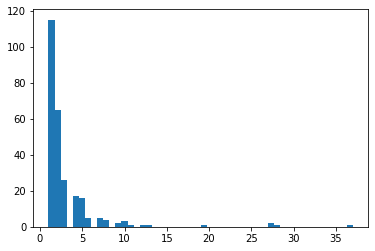

In [0]:
plt.hist(n_word_hip_pop_appareance[n_word_hip_pop_appareance != 0], bins=50)

It would be easy to fit a exponential distribution onto this. I planned to pickout several other words that might characterize other genres, and with a test set, each song would calculate its avarage probaility of being within each genre afterwhich the model would predict the highest probability option. Unfortunately, I did not enough time to do this experiment. Hope you see that all information required to build this model have been obtained.

#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|     | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. | 
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|